In [1]:
# Steps:
# preprocess + eda + feature selection
# extract input and output variables
# scale the values
# train test split 
# train the model 
# evaluate the model/model selection
# deploy the model 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('datasets/placement-project-logistic-regression/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
# preprocessing - removing the unnamed column coz its of no use
df=df.iloc[:,1:]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
# since no null values or anything to handle so move to EDA

In [8]:
# EDA
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CGPA x IQ')

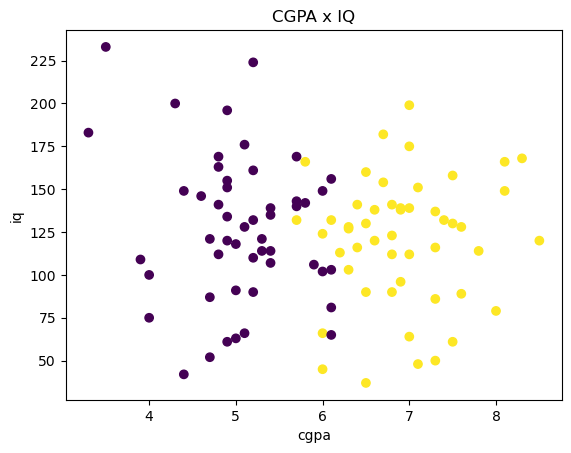

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.title('CGPA x IQ')

In [10]:
# extracting input and output variables 
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [11]:
# train-test split
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [13]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
# fit understands pattern and transforms converts the old values according to recognised pattern
X_train

array([[ 0.94812263, -1.9336374 ],
       [-0.16563588,  0.46568387],
       [-0.67967827,  2.55870881],
       [-0.85102573, -0.1469088 ],
       [-0.93669946,  0.26148631],
       [-1.45074185,  1.94611614],
       [-0.67967827,  0.21043692],
       [ 0.34840651, -0.19795819],
       [ 1.37649128, -0.88712493],
       [-0.50833081,  0.38910979],
       [ 0.43408024,  0.92512837],
       [ 0.26273278,  0.10833815],
       [-2.1361317 ,  2.78843106],
       [ 0.00571158,  0.64435673],
       [-1.70776305, -0.6063533 ],
       [-0.07996215, -0.45320513],
       [ 1.29081755, -1.60181638],
       [ 0.8624489 , -0.30005696],
       [ 0.6054277 ,  1.48667164],
       [-0.50833081, -0.42768043],
       [-0.67967827, -0.86160024],
       [-0.50833081, -0.24900757],
       [-1.10804693, -1.83153863],
       [-2.30747917,  1.51219634],
       [ 1.29081755,  0.15938754],
       [-1.10804693, -0.93817432],
       [ 0.00571158, -0.55530391],
       [ 0.34840651,  0.44015917],
       [-0.765352  ,

In [15]:
X_test=scaler.transform(X_test) 
#once pattern is recognised , one needn't to call the fit again
X_test

array([[ 0.69110143, -0.86160024],
       [-0.59400454, -0.24900757],
       [ 0.69110143, -0.30005696],
       [-0.25130961,  0.49120856],
       [ 0.8624489 , -1.52524229],
       [ 0.8624489 ,  1.92059145],
       [-0.93669946,  0.7975049 ],
       [-1.02237319,  1.00170245],
       [ 0.00571158, -2.01021149],
       [-0.50833081,  0.28701101]])

In [16]:
# model (here = logistic regression)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf=LogisticRegression()

In [19]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [20]:
# evaluating model
y_pred=clf.predict(X_test) #gives one prediction 
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [21]:
Y_test

35    1
46    0
93    1
6     0
64    1
26    1
76    0
34    0
10    1
49    0
Name: placement, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(Y_test,y_pred)

0.9

In [24]:
# making decision boundary - visualizing what pattern did the ml model noticed

In [28]:
# from mlxtend.plotting import plot_decisions_regions
# plot_decisions_regions(X_train,Y_train.values,clf=clf,legend=2)
# gives conflicts with matpllotlib

In [26]:
# pickle - converts any python object into a file which can be used in any other environment
import pickle

In [27]:
# pickle.dump(clf,open('placement_prediction_model.pkl','wb'))